# **Lab1: Regression**
In *lab 1*, you need to finish:

1.  Basic Part: Implement the regression model to predict people's grip force from their weight.
You can use either Matrix Inversion or Gradient Descent.


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implementing a regression model to predict grip force in a different way (for example, with more variables) than the basic part




---
# 1. Basic Part (50%)
In the first part, you need to implement the regression to predict grip force

Please save the prediction result in a CSV file and submit it to Kaggle

### Import Packages

> Note: You **cannot** import any other package


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

### Global attributes
Define the global attributes\
You can also add your own global attributes here

In [23]:
training_dataroot = 'lab1_basic_training.csv' # Training data file file named as 'lab1_basic_training.csv'
testing_dataroot = 'lab1_basic_testing.csv'   # Testing data file named as 'lab1_basic_testing.csv'
output_dataroot = 'lab1_basic.csv' # Output file will be named as 'lab1_basic.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be a list with 100 elements

### Load the Input File
First, load the basic input file **lab1_basic_training.csv** and **lab1_basic_testing.csv**

Input data would be stored in *training_datalist* and *testing_datalist*

[[ 55.4      32.8    ]
 [ 53.6      39.4    ]
 [ 78.4      52.6    ]
 ...
 [ 65.3      46.     ]
 [ 62.7     125.68257]
 [ 59.7      38.9    ]]
[[ 53.6 ]
 [ 51.54]
 [ 79.7 ]
 [ 56.68]
 [ 68.5 ]
 [ 64.8 ]
 [ 57.4 ]
 [ 63.5 ]
 [ 63.3 ]
 [ 61.4 ]
 [ 69.9 ]
 [ 92.5 ]
 [ 83.1 ]
 [ 51.3 ]
 [ 64.5 ]
 [ 64.2 ]
 [ 64.8 ]
 [ 57.3 ]
 [ 55.5 ]
 [ 67.4 ]
 [ 84.  ]
 [ 66.4 ]
 [ 84.8 ]
 [ 82.3 ]
 [ 51.4 ]
 [ 91.4 ]
 [ 77.7 ]
 [ 56.4 ]
 [ 66.3 ]
 [ 52.8 ]
 [ 82.9 ]
 [ 68.9 ]
 [ 64.2 ]
 [ 64.1 ]
 [ 76.1 ]
 [ 57.72]
 [ 45.22]
 [ 90.6 ]
 [ 44.1 ]
 [ 60.9 ]
 [ 50.3 ]
 [ 69.  ]
 [ 79.8 ]
 [ 59.6 ]
 [ 51.5 ]
 [ 78.7 ]
 [ 56.4 ]
 [ 53.6 ]
 [ 52.1 ]
 [ 66.4 ]
 [ 75.2 ]
 [ 56.  ]
 [ 60.  ]
 [ 69.1 ]
 [ 62.  ]
 [ 73.5 ]
 [ 59.8 ]
 [ 79.1 ]
 [ 52.9 ]
 [ 85.  ]
 [ 82.6 ]
 [ 48.8 ]
 [ 84.6 ]
 [ 80.4 ]
 [ 73.5 ]
 [ 86.7 ]
 [ 57.8 ]
 [ 49.2 ]
 [ 84.4 ]
 [ 65.5 ]
 [ 89.9 ]
 [ 66.96]
 [ 85.1 ]
 [ 79.7 ]
 [104.9 ]
 [ 54.28]
 [ 56.5 ]
 [ 68.5 ]
 [ 76.92]
 [ 97.  ]
 [ 67.1 ]
 [ 72.5 ]
 [ 63.3 ]
 [ 63.9 ]
 [ 72.8 ]
 [ 65.

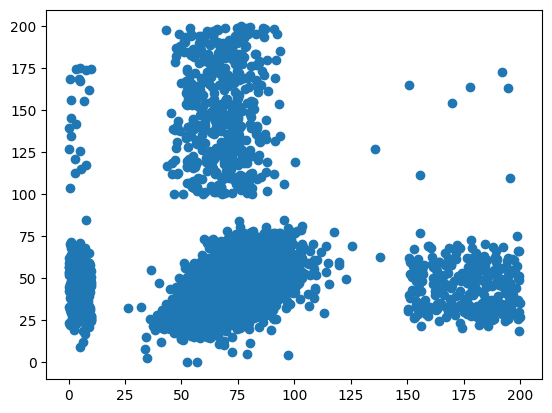

In [24]:
# Read input csv to datalist
with open(training_dataroot, newline="") as csvfile:
    training_datalist = pd.read_csv(training_dataroot).to_numpy()

with open(testing_dataroot, newline="") as csvfile:
    testing_datalist = pd.read_csv(testing_dataroot).to_numpy()

# --- DEBUG ---
print(training_datalist)
print(testing_datalist)
plt.scatter(training_datalist[:, 0], training_datalist[:, 1])

### Implement the Regression Model

> Note: It is recommended to use the functions we defined, you can also define your own functions

#### Step 1: Split Data
Split data in *training_datalist* into training dataset and validation dataset


In [25]:
def SplitData(data, split_ratio):
    """
    Splits the given dataset into training and validation sets based on the specified split ratio.

    Parameters:
    - data (numpy.ndarray): The dataset to be split. It is expected to be a 2D array where each row represents a data point and each column represents a feature.
    - split_ratio (float): The ratio of the data to be used for training. For example, a value of 0.8 means 80% of the data will be used for training and the remaining 20% for validation.

    Returns:
    - training_data (numpy.ndarray): The portion of the dataset used for training.
    - validation_data (numpy.ndarray): The portion of the dataset used for validation.

    """
    training_data = []
    validation_data = []

    # <TODO> Done
    data_size = len(data)
    training_data = data[: math.floor(data_size * split_ratio)]
    validation_data = data[math.floor(data_size * split_ratio) :]

    return training_data, validation_data

#### Step 2: Preprocess Data
Handle unreasonable data and missing data

> Hint 1: Outliers and missing data can be addressed by either removing them or replacing them using statistical methods (e.g., the mean of all data).

> Hint 2: Missing data are represented as `np.nan`, so functions like `np.isnan()` can be used to detect them.

> Hint 3: Methods such as the Interquartile Range (IQR) can help detect outliers

In [26]:
def PreprocessData(data):
    """
    Preprocess the given dataset and return the result.

    Parameters:
    - data (numpy.ndarray): The dataset to preprocess. It is expected to be a 2D array where each row represents a data point and each column represents a feature.

    Returns:
    - preprocessedData (numpy.ndarray): Preprocessed data.
    """
    # plt.scatter(data[:, 0], data[:, 1])

    preprocessedData = data

    # TODO
    print(f"{preprocessedData=}")

    data_removed_nan = np.array(
        [i for i in preprocessedData if not np.isnan(i[0]) and not np.isnan(i[1])]
    )

    # (x_mean, y_mean) = np.mean(data_removed_nan, axis=0).tolist()
    # print(f"{(x_mean, y_mean)=}")

    # x_q25, x_q50, x_q75 = np.percentile(data_removed_nan[:, 0], [25, 50, 75]).tolist()
    # y_q25, y_q50, y_q75 = np.percentile(data_removed_nan[:, 1], [25, 50, 75]).tolist()
    # print(f"{(x_q25, x_q75)=}, {(y_q25, y_q75)=}")

    # x_iqr = x_q75 - x_q25
    # y_iqr = y_q75 - y_q25
    # print(f"{x_iqr=}, {y_iqr=}")

    # x_ac_range = (x_q25 - 1.5 * x_iqr, x_q75 + 1.5 * x_iqr)
    # y_ac_range = (y_q25 - 1.5 * y_iqr, y_q75 + 1.5 * y_iqr)
    # print(f"{x_ac_range=}, {y_ac_range=}")

    # for i in preprocessedData:
    #     # nan value
    #     if np.isnan(i[0]):
    #         i[0] = x_mean
    #     if np.isnan(i[1]):
    #         i[1] = y_mean

    #     # extreme outlier
    #     if not x_ac_range[0] <= i[0] <= x_ac_range[1]:
    #         i[0] = x_q50
    #     if not y_ac_range[0] <= i[1] <= y_ac_range[1]:
    #         i[1] = y_q50

    
    # plt.scatter(preprocessedData[:, 0], preprocessedData[:, 1])
    # plt.plot(preprocessedData)

    return data_removed_nan

    # res = []
    # for i in preprocessedData:
    #     # nan value
    #     if (
    #         np.isnan(i[0])
    #         or np.isnan(i[1])
    #         or not x_ac_range[0] <= i[0] <= x_ac_range[1]
    #         or not y_ac_range[0] <= i[1] <= y_ac_range[1]
    #     ):
    #         continue

    #     res.append(i)

    # return np.array(res)


PreprocessData(training_datalist)

preprocessedData=array([[ 55.4    ,  32.8    ],
       [ 53.6    ,  39.4    ],
       [ 78.4    ,  52.6    ],
       ...,
       [ 65.3    ,  46.     ],
       [ 62.7    , 125.68257],
       [ 59.7    ,  38.9    ]])


array([[ 55.4    ,  32.8    ],
       [ 53.6    ,  39.4    ],
       [ 78.4    ,  52.6    ],
       ...,
       [ 65.3    ,  46.     ],
       [ 62.7    , 125.68257],
       [ 59.7    ,  38.9    ]])

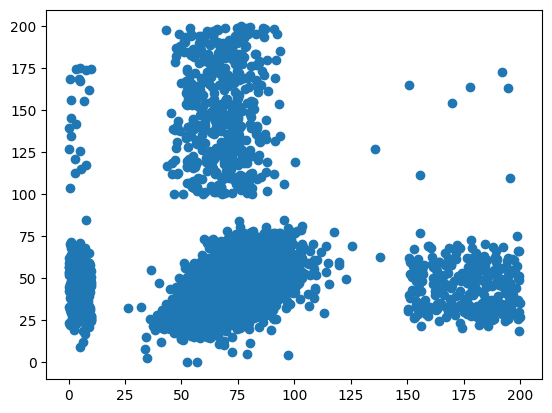

In [27]:
plt.scatter(training_datalist[:, 0], training_datalist[:, 1])

### Step 3: Implement Regression
You have to use Gradient Descent to finish this part

In [31]:
def Regression(dataset):
    """
    Performs regression on the given dataset and return the coefficients.

    Parameters:
    - dataset (numpy.ndarray): A 2D array where each row represents a data point.

    Returns:
    - w (numpy.ndarray): The coefficients of the regression model. For example, y = w[0] + w[1] * x + w[2] * x^2 + ...
    """

    X = dataset[:, :1]
    y = dataset[:, 1]
    # print(f"{np.sum(y)=}")

    # print(f"{X=}, {y=}")

    # <TODO>: Decide on the degree of the polynomial
    degree = 2  # For example, quadratic regression

    # Add polynomial features to X
    X_poly = np.ones((X.shape[0], 1))  # Add intercept term (column of ones)
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X**d))  # Add x^d terms to feature matrix
    # print(f"{X_poly=}")

    # Initialize coefficients (weights) to zero
    # Number of features (including intercept and polynomial terms)
    num_dimensions = X_poly.shape[1]
    w = np.zeros(num_dimensions)  # shihtl> 這個 w 就是我們要解的東西
    # print(f"{num_dimensions=}, {w=}")

    # <TODO>: Set hyperparameters
    num_iteration = 70_0000
    # learning_rate = 0.00000001

    # Gradient Descent
    m = len(y)  # Number of data points
    for iteration in range(2, 2 + num_iteration):
        learning_rate = 0.001 * (
            1 / math.log(math.log(iteration, 1.00000001), 1.00000001)
        )
        # print(f"{learning_rate=}")
        # <TODO>: Prediction using current weights and compute error
        # print(f"{X_poly.shape=}, {w.shape=}")
        y_hat = X_poly @ w
        d = y - y_hat
        # print(f"{d.shape=}, {X_poly.shape=}, {len(y)=}")

        # <TODO>: Compute gradient
        # g = -2 * (np.matmul(np.transpose(d), X_poly) / len(y))
        g = -2 * (np.transpose(d) @ X_poly) / m

        # <TODO>: Update the weights
        w = w - learning_rate * g

        # <TODO>: Optionally, print the cost every 100 iterations
        if iteration % 10000 == 0:
            cost = np.sum((y - y_hat) ** 2) / len(y)
            print(f"Iteration {iteration}, Cost: {cost}")
        # cost = np.sum((y - y_hat) ** 2) / len(y)
        # print(f"Iteration {iteration}, Cost: {cost}\n\n")

    return w

### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*

In [29]:

def MakePrediction(w, test_dataset):
    """
    Predicts the output for a given test dataset using a regression model.

    Parameters:
    - w (numpy.ndarray): The coefficients of the model, where each element corresponds to
                               a coefficient for the respective power of the independent variable.
    - test_dataset (numpy.ndarray): A 1D array containing the input values (independent variable)
                                          for which predictions are to be made.

    Returns:
    - list/numpy.ndarray: A list or 1d array of predicted values corresponding to each input value in the test dataset.
    """
    prediction = []

    # TODO
    for data in test_dataset:
        # prediction.append(w[0] + w[1] * data)
        prediction.append(w[0] + w[1] * data + w[2] * data * data)

    return np.array(prediction)


### Step 5: Train Model and Generate Result

Use the above functions to train your model on training dataset, and predict the answer of testing dataset.

Save your predicted values in `output_datalist`

> Notice: **Remember to inclue the coefficients of your model in the report**



In [32]:
# TODO

# (1) Split data
training_data, validation_data = SplitData(training_datalist, 0.9)

# (2) Preprocess data
training_data = PreprocessData(training_data)
validation_data = PreprocessData(validation_data)
validation_data_x = validation_data[:, 0]
validation_data_y = validation_data[:, 1]

# (3) Train regression model
w = Regression(training_data)

# (4) Predict validation dataset's answer, calculate MAPE comparing to the ground truth
predicted_res = MakePrediction(w, validation_data_x)
validation_mape = np.mean(np.absolute(np.subtract(validation_data_y, predicted_res) / validation_data_y))
print(f"{validation_mape=}")

# (5) Make prediction of testing dataset and store the values in output_datalist
output_datalist = MakePrediction(w, testing_datalist[:, 0])

preprocessedData=array([[55.4, 32.8],
       [53.6, 39.4],
       [78.4, 52.6],
       ...,
       [50.2, 25.1],
       [77.7, 61.8],
       [88.2, 52.7]])
preprocessedData=array([[ 61.5    , 197.1171 ],
       [ 83.     ,  54.     ],
       [ 81.2    ,  50.8    ],
       ...,
       [ 65.3    ,  46.     ],
       [ 62.7    , 125.68257],
       [ 59.7    ,  38.9    ]])
Iteration 10000, Cost: 2250.699883951485
Iteration 20000, Cost: 1924.9946333206597
Iteration 30000, Cost: 1806.200321996138
Iteration 40000, Cost: 1762.7281792654733
Iteration 50000, Cost: 1746.7827088510744
Iteration 60000, Cost: 1740.9188566354385
Iteration 70000, Cost: 1738.7528477108394
Iteration 80000, Cost: 1737.9446747964494
Iteration 90000, Cost: 1737.6355347777028
Iteration 100000, Cost: 1737.5099352109742
Iteration 110000, Cost: 1737.4518845746356
Iteration 120000, Cost: 1737.4187099550659
Iteration 130000, Cost: 1737.3947030216677
Iteration 140000, Cost: 1737.3740783398055
Iteration 150000, Cost: 1737.35470402

### *Write the Output File*

Write the prediction to output csv and upload the file to Kaggle
> Format: 'Id', 'gripForce'


In [363]:
# Assume that output_datalist is a list (or 1d array) with length = 100

with open(output_dataroot, "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Id", "gripForce"])
    for i in range(len(output_datalist)):
        writer.writerow([i, output_datalist[i]])

# 2. Advanced Part (45%)
In the second part, you need to implement regression differently from the basic part to improve your grip force predictions. You must use more than two features.

You can choose either matrix inversion or gradient descent for this part

We have provided `lab1_advanced_training.csv` for your training

> Notice: Be cautious of the "gender" attribute, as it is represented by "F"/"M" rather than a numerical value.

Please save the prediction result in a CSV file and submit it to Kaggle

In [ ]:
training_dataroot = 'lab1_advanced_training.csv' # Training data file file named as 'lab1_advanced_training.csv'
testing_dataroot = 'lab1_advanced_testing.csv'   # Testing data file named as 'lab1_advanced_testing.csv'
output_dataroot = 'lab1_advanced.csv' # Output file will be named as 'lab1_advanced.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be a list with 3000 elements

In [ ]:
# Read input csv to datalist
with open(training_dataroot, newline='') as csvfile:
  training_datalist = pd.read_csv(training_dataroot).to_numpy()

with open(testing_dataroot, newline='') as csvfile:
  testing_datalist = pd.read_csv(testing_dataroot).to_numpy()

In [ ]:
# TODO

# (1) Split data

# (2) Preprocess data

# (3) Train regression model

# (4) Predict validation dataset's answer, calculate MAPE comparing to the ground truth

# (5) Make prediction of testing dataset and store the values in output_datalist

# Save the Code File
Please save your code and submit it as an ipynb file! (**Lab1.ipynb**)